In [19]:
import numpy as np
import pandas as pd
import os
import sys

# Add the directory containing the VotingModel to the Python path
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from model.VotingRules import mean_aggregation, median_aggregation, quadratic_aggregation
from model.VotingModel import VotingModel

def calculate_gini_index(allocation):
    """Calculate the Gini Index for a given allocation."""
    m = len(allocation)
    if m == 0:
        return 0
    allocation_sorted = np.sort(allocation)
    cumulative_allocation = np.cumsum(allocation_sorted)
    numerator = 2 * np.sum((np.arange(1, m + 1) - 1) * allocation_sorted) - m * cumulative_allocation[-1]
    denominator = m * cumulative_allocation[-1]
    return numerator / denominator

def evaluate_gini_index(model):
    gini_results = []
    for method in ["mean", "median", "quadratic"]:
        allocation = model.allocate_funds(method)
        gini = calculate_gini_index(allocation)
        gini_results.append({
            "voting_rule": method,
            "gini_index": gini
        })

    return pd.DataFrame(gini_results)

# Initialize the model
num_voters = 144
num_projects = 600
total_op_tokens = 30e6
voter_type="random_uniform_model"
model = VotingModel(voter_type=voter_type,num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)
model.step()

# Evaluate Gini Index
gini_results = evaluate_gini_index(model)

gini_results

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


,voting_rule,gini_index
0,mean,0.048167
1,median,0.065424
2,quadratic,0.023857


In [20]:


def simulate_gini_index(model, num_rounds, voting_rules):
    results = {'round': list(range(1, num_rounds + 1))}
    for voting_rule in voting_rules:
        results[f'{voting_rule}_gini_index'] = []
    
    for round_num in range(num_rounds):
        model.step()
        for voting_rule in voting_rules:
            allocation = model.allocate_funds(voting_rule)
            gini_index = calculate_gini_index(allocation)
            results[f'{voting_rule}_gini_index'].append(gini_index)
    
    return pd.DataFrame(results)

# Parameters for the simulation
voter_type = 'random_uniform_model'
num_voters = 144
num_projects = 600
total_op_tokens = 30e6
num_rounds = 100
voting_rules = ["mean", "median", "quadratic"]  # Voting rules to evaluate

# Initialize the model
model = VotingModel(voter_type=voter_type, num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Simulate the Gini Index calculation
gini_results = simulate_gini_index(model, num_rounds, voting_rules)

gini_results

/Users/idrees/Code/govxs/agents/VoterAgent.py:7: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


,round,mean_gini_index,median_gini_index,quadratic_gini_index
0,1,0.048034,0.068490,0.024465
1,2,0.045511,0.064767,0.022882
2,3,0.043213,0.061467,0.021470
3,4,0.045702,0.064495,0.022890
4,5,0.045554,0.067265,0.023372
...,...,...,...,...
95,96,0.043957,0.063318,0.022028
96,97,0.045828,0.066959,0.023372
97,98,0.048340,0.070237,0.024611
98,99,0.042261,0.060576,0.021185


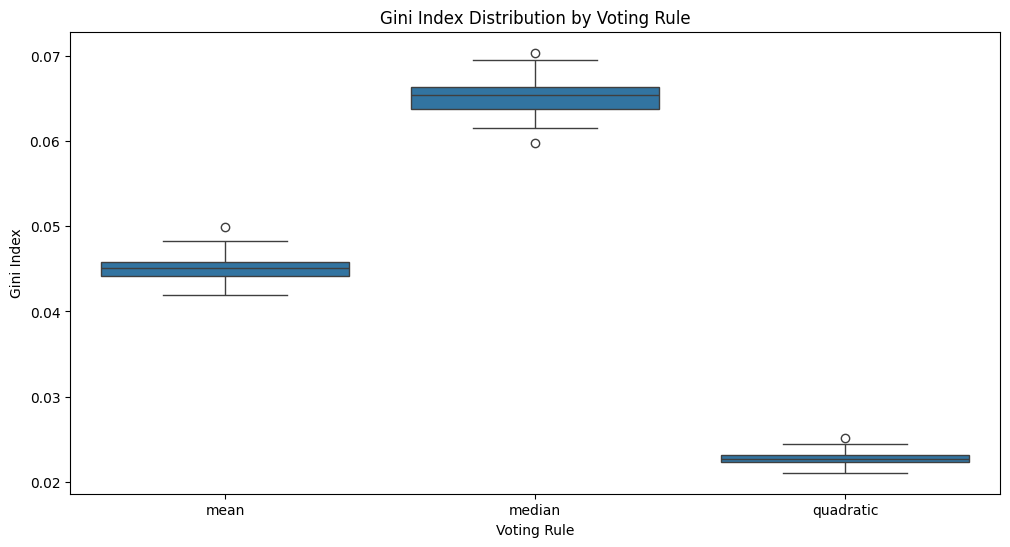

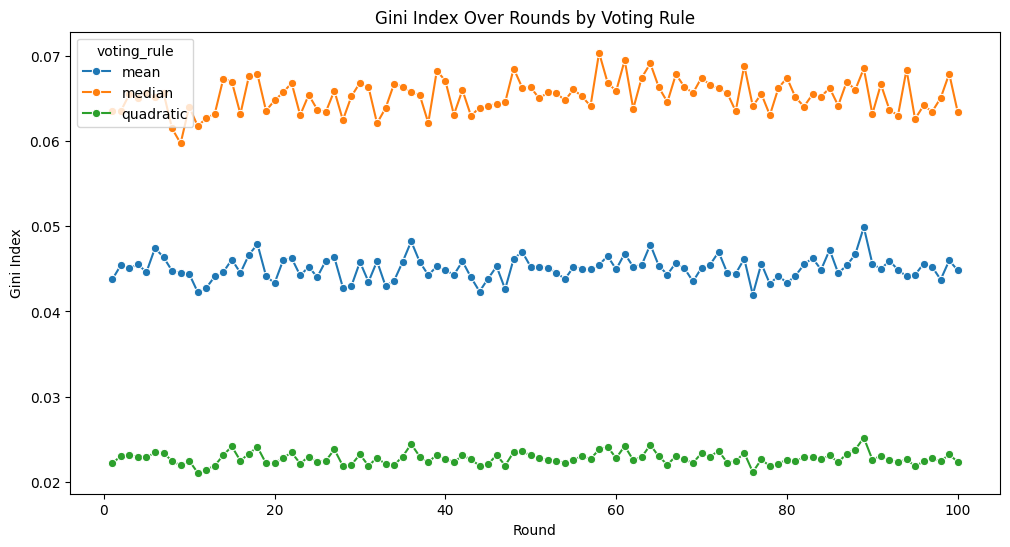

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for box plot
gini_results_long = gini_results.melt(id_vars=['round'], var_name='voting_rule', value_name='gini_index')
gini_results_long['voting_rule'] = gini_results_long['voting_rule'].str.replace('_gini_index', '')

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='voting_rule', y='gini_index', data=gini_results_long)
plt.title('Gini Index Distribution by Voting Rule')
plt.xlabel('Voting Rule')
plt.ylabel('Gini Index')
plt.show()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='round', y='gini_index', hue='voting_rule', data=gini_results_long, marker='o')
plt.title('Gini Index Over Rounds by Voting Rule')
plt.xlabel('Round')
plt.ylabel('Gini Index')
plt.show()
